In [10]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [11]:
df_DA = df[df['job_title_short'] == 'Data Analyst']



In [12]:
df_counts = df_DA['job_health_insurance'].value_counts().copy()

df_counts

job_health_insurance
False    171351
True      24724
Name: count, dtype: int64

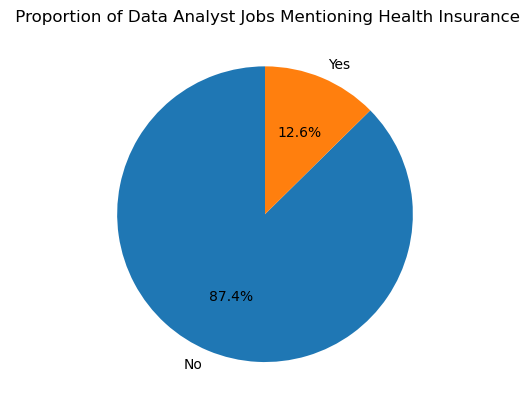

In [13]:
plt.pie(df_counts, labels=['No', 'Yes'], startangle=90, autopct= '%1.1f%%')
plt.title(' Proportion of Data Analyst Jobs Mentioning Health Insurance')
plt.show()

In [21]:
df_ft_pt = df[df['job_schedule_type'].isin(['Full-time', 'Part-time'])].copy()

df_ft_pt['job_schedule_type'].value_counts()

job_schedule_type
Full-time    701727
Part-time      7881
Name: count, dtype: int64

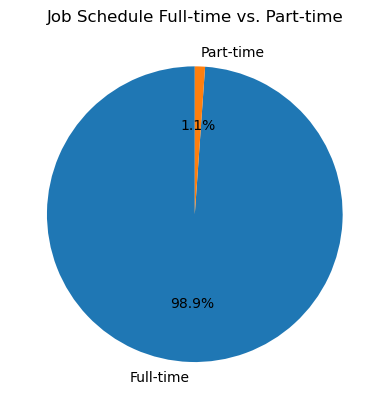

In [23]:
counts = df_ft_pt['job_schedule_type'].value_counts()
plt.pie(counts, labels=counts.index, startangle=90, autopct='%1.1f%%')
plt.title('Job Schedule Full-time vs. Part-time')
plt.show()

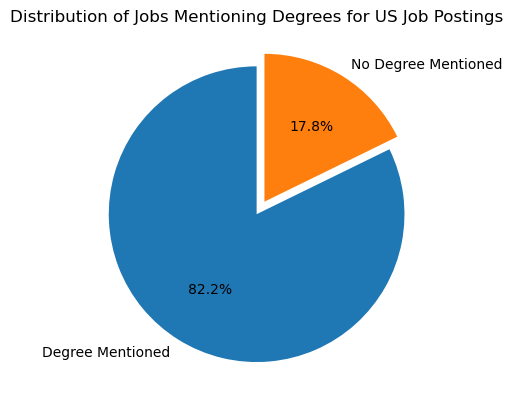

In [26]:
df_US = df[df['job_country'] == 'United States'].copy()
degree_counts = df_US['job_no_degree_mention'].value_counts()

plt.pie(degree_counts, labels=['Degree Mentioned', 'No Degree Mentioned'], explode=(0, 0.1), startangle=90, autopct='%1.1f%%')
plt.title('Distribution of Jobs Mentioning Degrees for US Job Postings')
plt.show()
